# Generation of observation from inhomogenous Poisson process

## Algorithm by Lewis and Shedler, 1979

In [1]:
import numpy as np
from Generator import LewisShedler

In [2]:
T = np.pi
n_size = 1000

In [3]:
def lam(t):
    return np.where(t < 1, n_size, n_size*(np.sin(t**2*np.pi)+1)/3)

In [4]:
generator = LewisShedler(lam, T, lambda_hat=n_size)

Maximum of the intensity function: 1000.0


In [5]:
%%timeit 
t = generator.generate()

635 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
t = generator.generate()
print('Number of simulated points: {}'.format(len(t)))

Number of simulated points: 1713


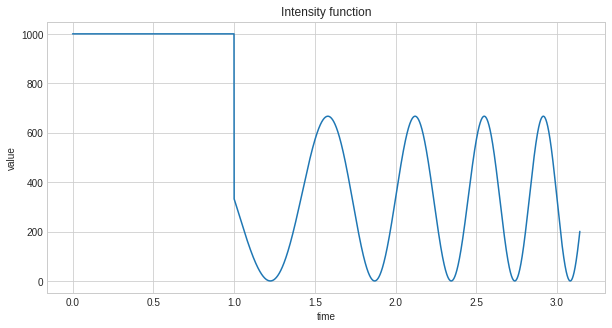

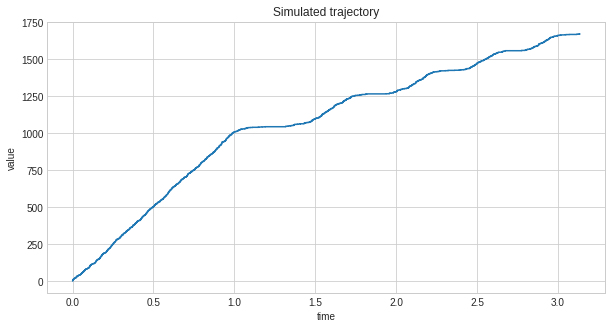

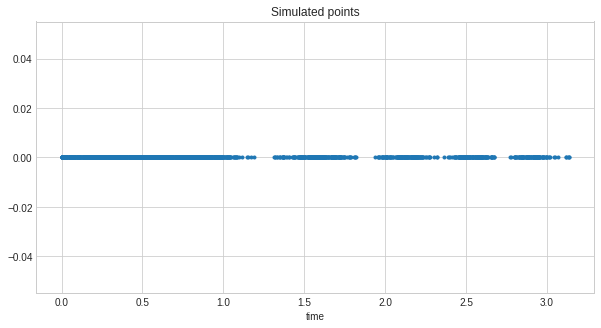

<Figure size 720x360 with 0 Axes>

In [7]:
generator.visualize(save=False)

# Approximation of integral operator

In [8]:
import numpy as np
from Operator import Operator

In [9]:
def kernel(x, y):
    return np.where(x < y, 1, 1)

In [10]:
operator = Operator(kernel, 0, 1, 10000, adjoint=True, quadrature="rectangle")

In [11]:
oper = operator.approximate()

Calculating operator approximation...
Calculating adjoint operator approximation...
approximate ran in 1.140911340713501 s


In [12]:
oper = operator.K
oper.shape

(10000, 10000)

# Estimation of intensity function using Landweber and Tikhonov algorithm

In [13]:
import numpy as np
from Generator import LewisShedler
from Estimators import Landweber, Tikhonov

In [14]:
sample_size = 1000

In [15]:
def kernel(x, y):
    return np.where(x<y, (1 + np.sin(20*y)),  (1 + np.sin(20*y)))

In [16]:
def lam(t):
    return sample_size * (1 + np.sin(20*t))

Maximum of the intensity function: 1999.9999999999857


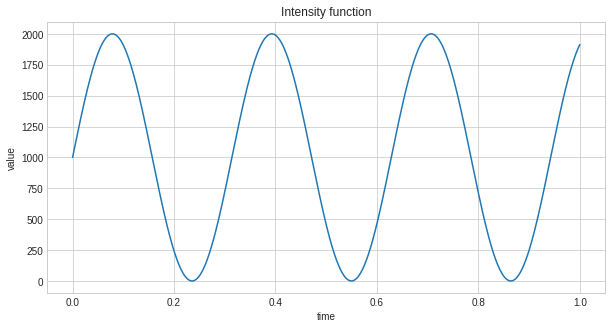

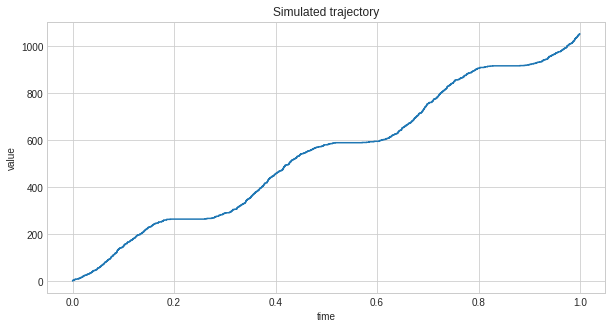

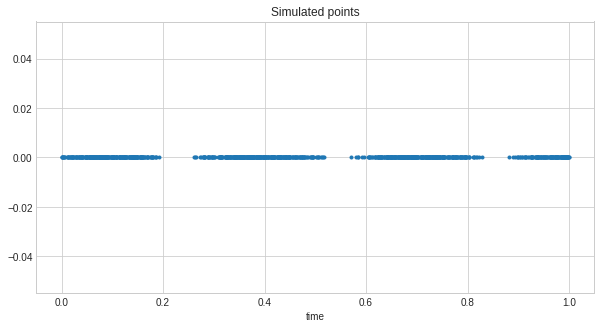

<Figure size 720x360 with 0 Axes>

In [17]:
generator = LewisShedler(lam, 1)
obs = generator.generate()
generator.visualize()

In [18]:
landweber = Landweber(kernel, 0, 1, 10000, obs, sample_size, adjoint=False)

Calculating operator approximation...
Calculating adjoint operator approximation...
approximate ran in 4.524597406387329 s
__premultiplication ran in 4.544436454772949 s
Estimating q function...
estimate_q ran in 0.6381123065948486 s
Estimating noise level...
Estimated noise level: 0.05111646176587614
estimate_delta ran in 0.037857770919799805 s


In [19]:
landweber.observations = generator.generate()
landweber.refresh()

Estimating q function...
estimate_q ran in 0.468153715133667 s
Estimating noise level...
Estimated noise level: 0.04905494977662135
estimate_delta ran in 0.03786492347717285 s


In [20]:
landweber.estimate()

Iteration: 1
__iteration ran in 0.5996923446655273 s
Iteration: 2
__iteration ran in 0.6060774326324463 s
Iteration: 3
__iteration ran in 0.5626668930053711 s
Iteration: 4
__iteration ran in 0.538985013961792 s
Iteration: 5
__iteration ran in 0.5391831398010254 s
Total elapsed time: 4.878523826599121


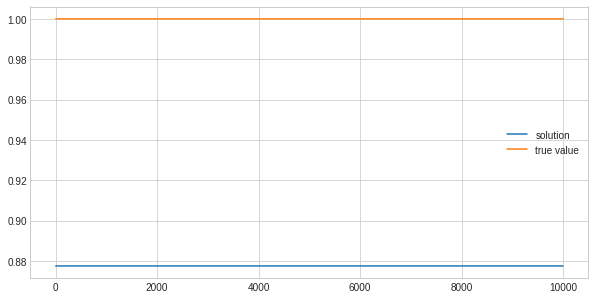

In [21]:
import matplotlib.pyplot as plt
plt.plot(landweber.solution, label='solution')
plt.plot(np.repeat(1, landweber._Landweber__grid.shape[0]), label='true value')
plt.legend()

In [22]:
tikhonov = tikhonov = Tikhonov(kernel, 0, 1, 10000, obs, sample_size, adjoint=False)

Calculating operator approximation...
Calculating adjoint operator approximation...
approximate ran in 5.418225288391113 s
__premultiplication ran in 5.243789911270142 s
__premultiplication ran in 4.1179821491241455 s
Estimating q function...
estimate_q ran in 0.6623084545135498 s
Estimating noise level...
Estimated noise level: 0.05111646176587614
estimate_delta ran in 0.04072690010070801 s


In [23]:
tikhonov.observations = generator.generate()
tikhonov.refresh()

Estimating q function...
estimate_q ran in 0.5166151523590088 s
Estimating noise level...
Estimated noise level: 0.04972299022928991
estimate_delta ran in 0.03682255744934082 s


In [25]:
tikhonov.estimate()

Number of search steps done: 1
__estimate_one_step ran in 4.011352777481079 s
Number of search steps done: 2
__estimate_one_step ran in 4.956499814987183 s
Number of search steps done: 3
__estimate_one_step ran in 4.19817328453064 s
Number of search steps done: 4
__estimate_one_step ran in 4.632627964019775 s
Number of search steps done: 5
__estimate_one_step ran in 4.194749355316162 s
Number of search steps done: 6
__estimate_one_step ran in 4.092044115066528 s
Number of search steps done: 7
__estimate_one_step ran in 4.1889872550964355 s
Number of search steps done: 8
__estimate_one_step ran in 4.073016881942749 s
Number of search steps done: 9
__estimate_one_step ran in 4.011654615402222 s
Number of search steps done: 10
__estimate_one_step ran in 4.120449781417847 s
Number of search steps done: 11
__estimate_one_step ran in 4.027787446975708 s
Number of search steps done: 12
__estimate_one_step ran in 4.073315620422363 s
Number of search steps done: 13
__estimate_one_step ran in 4.

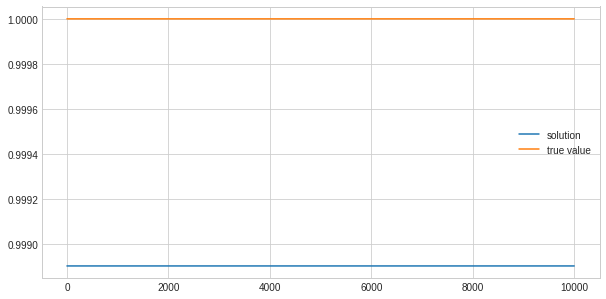

In [27]:
import matplotlib.pyplot as plt
plt.plot(tikhonov.solution, label='solution')
plt.plot(np.repeat(1, tikhonov._Tikhonov__grid.shape[0]), label='true value')
plt.legend()